In [3]:
import docx2txt
import nltk
import re
from nltk.text import Text
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import pandas as pd

# Loading and Cleaning Raw Text Data

## Import book

### Convert book from .doc to string

In [4]:
fire_and_blood = docx2txt.process("fire-and-blood.docx")

## Scrape question data from online

In [1]:
#TODO

### Removing garbage from top and bottom of new string

In [5]:
#Get rid of garbage at top(title, table of contents, etc)
novel = fire_and_blood.split("\n", 193)
#Get rid of garbage at bottom(lineage image, publisher info)
novel = novel[193].rsplit("\n",8559-8308)
novel = novel[0]

## Extracting entities

### Clean up data(remove whitespace)

In [6]:
#But first, only allow single spaces. No >double spaces
novel = re.sub("\s+", " ", novel, flags=re.IGNORECASE)
novel = re.sub(r"\\n", " ", novel, flags=re.IGNORECASE)

### Tokenize data, and lemmatize it

In [7]:
vocabulary = word_tokenize(novel)
#Lemmatize everything now
wnl=WordNetLemmatizer()
placeholder_vocabulary = []
for word in vocabulary:
    placeholder_vocabulary.append(wnl.lemmatize(word))
#Bug in lemmatize function where "was" is converted to "wa"
#Fix this
vocabulary = [x.replace("wa", "was") for x in placeholder_vocabulary]



### Remove stop words

In [8]:
stop_words = set(stopwords.words("english"))
print(stop_words)
filtered_vocabulary = []
for w in vocabulary:
    if w.lower() not in stop_words and w.isalnum():
        filtered_vocabulary.append(w.lower())
  

{'is', 'only', 'needn', 'hers', 'him', 'when', 'both', 'i', 'its', 'from', 'yourself', 'under', 'nor', 'we', 'were', "you've", 've', 'didn', 'his', 'too', "haven't", 'between', 'wouldn', 'why', 'wasn', 'up', "hadn't", 'weren', "won't", 'then', 'these', "don't", 'couldn', 'but', 'after', 'by', 'y', 'yours', "wasn't", 'down', 'had', "isn't", 'it', 'shan', 'am', 'there', 'few', 'than', 'because', 'on', 'those', 'out', 'aren', 'myself', 'has', 'if', 'once', 'before', 'will', 'won', 'ours', 'yourselves', 'the', 'll', 'ourselves', 'now', 'haven', "you're", 'any', 'in', "shan't", 'do', 'have', 'such', 'd', 'against', 'doesn', 'with', 'does', 'having', "aren't", 'doing', 'again', 'below', "you'll", "that'll", 'don', 'above', 'about', 'very', 'your', 'further', 'itself', 'their', 'you', "doesn't", 'which', 'my', 'at', 'did', 'who', 'are', 'through', 'all', 'each', 'most', 'should', 'themselves', 'as', 'some', "she's", 'until', 'over', 'while', "it's", 'where', 'her', 'hasn', 'that', 'can', 'thi

In [9]:
len(filtered_vocabulary)

134928

## Frequency Distribution

### Creating and plotting distribution

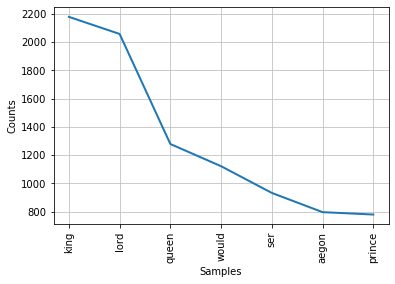

['king',
 'lord',
 'queen',
 'would',
 'ser',
 'aegon',
 'prince',
 'one',
 'men',
 'dragon',
 'year',
 'said',
 'son',
 'hand',
 'lady',
 'could',
 'day',
 'even',
 'jaehaerys',
 'brother',
 'time',
 'landing',
 'man',
 'princess',
 'though',
 'upon',
 'targaryen',
 'well',
 'knight',
 'septon',
 'child',
 'two',
 'three',
 'first',
 'daughter',
 'maester',
 'might',
 'grace',
 'dragonstone',
 'many',
 'made',
 'came',
 'city',
 'never',
 'whilst',
 'mother',
 'young',
 'boy',
 'took',
 'red',
 'seven',
 'end',
 'house',
 'great',
 'castle',
 'back',
 'sea',
 'old',
 'alysanne',
 'iron',
 'maegor',
 'sister',
 'u',
 'father',
 'wife',
 'told',
 'grand',
 'word',
 'throne',
 'rhaena',
 'death',
 'keep',
 'rhaenyra',
 'ac',
 'night',
 'say',
 'velaryon',
 'long',
 'girl',
 'mushroom',
 'however',
 'new',
 'yet',
 'realm',
 'come',
 'found',
 'black',
 'take',
 'still',
 'woman',
 'another',
 'court',
 'last',
 'high',
 'every',
 'council',
 'oldtown',
 'sword',
 'hundred',
 'died',
 'da

In [10]:
fd = nltk.FreqDist(filtered_vocabulary)
fd.plot(7,cumulative=False)
fd.freq("queen")*100
most_common_words = [word for (word, count) in fd.most_common()]
most_common_words

### Getting Bigrams

In [11]:
bigrams = list(nltk.bigrams(filtered_vocabulary))

### Entity Extraction (should be better)

In [10]:
import spacy
import en_core_web_sm
spacy_model = en_core_web_sm.load()
spacy_model.max_length=1500000
entity_doc = spacy_model(novel)
entity_doc.ents

2023-02-10 15:47:19.265980: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-10 15:47:19.680202: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-10 15:47:19.680238: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-10 15:47:19.740097: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-02-10 15:47:20.641779: W tensorflow/stream_executor/platform/de

(Citadel,
 Westeros,
 Aegon s Conquest,
 the past three hundred years  Births,
 AC,
 BC,
 Conquest,
 Aegon Targaryen,
 Seven,
 a single day,
 Aegon,
 Conquest,
 Dorne,
 Sporadic,
 Dornishmen,
 the Blackwater Rush  ,
 three,
 Aegon,
 Conqueror,
 the day,
 the High Septon of the Faith  This,
 two years,
 Aegon s Landing  ,
 three,
 Aegon,
 Valyrian,
 Twelve years,
 the Doom of Valyria,
 BC,
 Aenar Targaryen,
 kin,
 Valyria,
 Aenar,
 Daenys,
 Valyria,
 Doom,
 twelve years later,
 Valyrian,
 two centuries,
 Gullet,
 Blackwater Bay,
 Targaryens,
 Valyrian,
 Velaryon,
 Valyrian,
 Targaryens,
 a hundred years,
 the Doom of Valyria  ,
 Century of Blood   House,
 Westeros  Gaemon Targaryen,
 Exile,
 Aegon,
 Elaena,
 Maegon,
 Aelyx  Baelon  and Daemion  ,
 three,
 Aegon,
 Aegon,
 second,
 Lady Valaena,
 House Velaryon  ,
 half,
 Aegon,
 two,
 Visenya,
 Rhaenys,
 Valyria,
 Aegon,
 Visenya,
 Rhaenys,
 second,
 Aegon,
 Visenya,
 Rhaenys,
 three,
 five,
 Aenar,
 Exile,
 Valyria,
 Aegon s day,
 Baler

### Latent Dieichlet Allocation